# Categorical Data in Python

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

 
life_expectancy =  pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/life_expectancy.csv")
print(life_expectancy.head())

           Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                         

In [16]:
life_expectancy.columns = life_expectancy.columns.map(lambda c: c.lower())
print(life_expectancy.columns)

Index(['country name', 'country code', 'region', 'incomegroup', 'year',
       'life expectancy world bank', 'prevelance of undernourishment', 'co2',
       'health expenditure %', 'education expenditure %', 'unemployment',
       'corruption', 'sanitation', 'injuries', 'communicable',
       'noncommunicable'],
      dtype='object')


In [4]:
life_expectancy.describe()

,year,life expectancy world bank,prevelance of undernourishment,co2,health expenditure %,education expenditure %,unemployment,corruption,sanitation,injuries,communicable,noncommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [5]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country name                    3306 non-null   object 
 1   country code                    3306 non-null   object 
 2   region                          3306 non-null   object 
 3   incomegroup                     3306 non-null   object 
 4   year                            3306 non-null   int64  
 5   life expectancy world bank      3118 non-null   float64
 6   prevelance of undernourishment  2622 non-null   float64
 7   co2                             3154 non-null   float64
 8   health expenditure %            3126 non-null   float64
 9   education expenditure %         2216 non-null   float64
 10  unemployment                    3002 non-null   float64
 11  corruption                      975 non-null    float64
 12  sanitation                      20

In [17]:
threshold = len(life_expectancy)*0.05
col_to_drop = life_expectancy.columns[life_expectancy.isna().sum() > threshold]
print(col_to_drop)

Index(['life expectancy world bank', 'prevelance of undernourishment',
       'health expenditure %', 'education expenditure %', 'unemployment',
       'corruption', 'sanitation'],
      dtype='object')


In [18]:
col_with_missing_values = life_expectancy.columns[life_expectancy.isna().sum() > 0]
for col in col_with_missing_values:
    life_expectancy[col].fillna(life_expectancy[col].mean())

In [13]:
life_expectancy.isna().sum()

country name                         0
country code                         0
region                               0
incomegroup                          0
year                                 0
life expectancy world bank         188
prevelance of undernourishment     684
co2                                152
health expenditure %               180
education expenditure %           1090
unemployment                       304
corruption                        2331
sanitation                        1247
injuries                             0
communicable                         0
noncommunicable                      0
dtype: int64

In [19]:
life_expectancy.columns = life_expectancy.columns.str.replace(' ', '_')
print(life_expectancy.columns)

Index(['country_name', 'country_code', 'region', 'incomegroup', 'year',
       'life_expectancy_world_bank', 'prevelance_of_undernourishment', 'co2',
       'health_expenditure_%', 'education_expenditure_%', 'unemployment',
       'corruption', 'sanitation', 'injuries', 'communicable',
       'noncommunicable'],
      dtype='object')


In [20]:
life_expectancy[['country_name', 'country_code', 'region', 'incomegroup']] = life_expectancy[["country_name", 'country_code', 'region', 'incomegroup']].astype('category')

In [23]:
print(life_expectancy.select_dtypes('category'))

              country_name country_code                      region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              incomegroup  
0              Low income  
1     Lower middle income  
2     Upper middle income  
3             High income  
4      

In [24]:
life_expectancy['year'] = pd.to_datetime(life_expectancy['year'])

In [25]:
life_expectancy['year']

0      1970-01-01 00:00:00.000002001
1      1970-01-01 00:00:00.000002001
2      1970-01-01 00:00:00.000002001
3      1970-01-01 00:00:00.000002001
4      1970-01-01 00:00:00.000002001
                    ...             
3301   1970-01-01 00:00:00.000002019
3302   1970-01-01 00:00:00.000002019
3303   1970-01-01 00:00:00.000002019
3304   1970-01-01 00:00:00.000002019
3305   1970-01-01 00:00:00.000002019
Name: year, Length: 3306, dtype: datetime64[ns]

In [26]:
print(life_expectancy['region'].value_counts())

region
Europe & Central Asia         893
Sub-Saharan Africa            836
Latin America & Caribbean     551
East Asia & Pacific           513
Middle East & North Africa    304
South Asia                    152
North America                  57
Name: count, dtype: int64


<Axes: xlabel='region'>

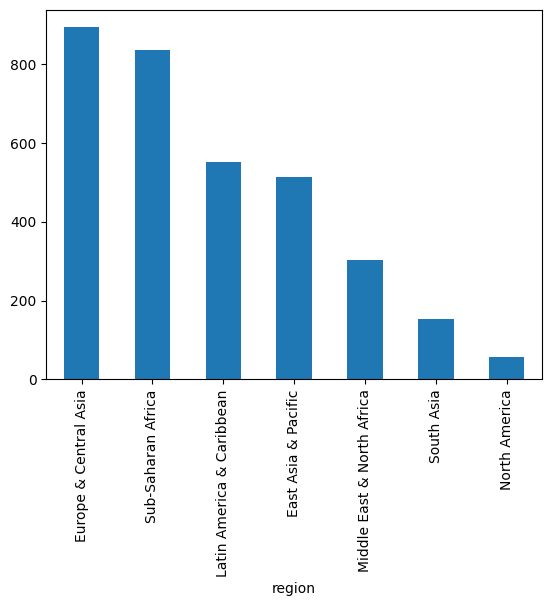

In [27]:
life_expectancy['region'].value_counts().plot.bar()

In [28]:
print(life_expectancy.select_dtypes('category'))

              country_name country_code                      region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              incomegroup  
0              Low income  
1     Lower middle income  
2     Upper middle income  
3             High income  
4      

In [29]:
map_update = {
    'Lower middle income' : 'middle',
    'Upper middle income' : 'middle'
}

life_expectancy['incomegroup'] = life_expectancy["incomegroup"].replace(map_update)
print(life_expectancy['incomegroup'].value_counts())

incomegroup
middle         1786
High income    1083
Low income      437
Name: count, dtype: int64


C:\Users\Danhaya\AppData\Local\Temp\ipykernel_4428\629497576.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  life_expectancy['incomegroup'] = life_expectancy["incomegroup"].replace(map_update)


In [30]:
life_expectancy['incomegroup'].dtype

CategoricalDtype(categories=['High income', 'Low income', 'middle'], ordered=False, categories_dtype=object)

In [34]:
# rename categories
life_expectancy['incomegroup'] = life_expectancy['incomegroup'].cat.rename_categories(lambda c: c.title())

In [35]:
print(life_expectancy['incomegroup'].unique())

['Low Income', 'Middle', 'High Income']
Categories (3, object): ['High Income', 'Low Income', 'Middle']


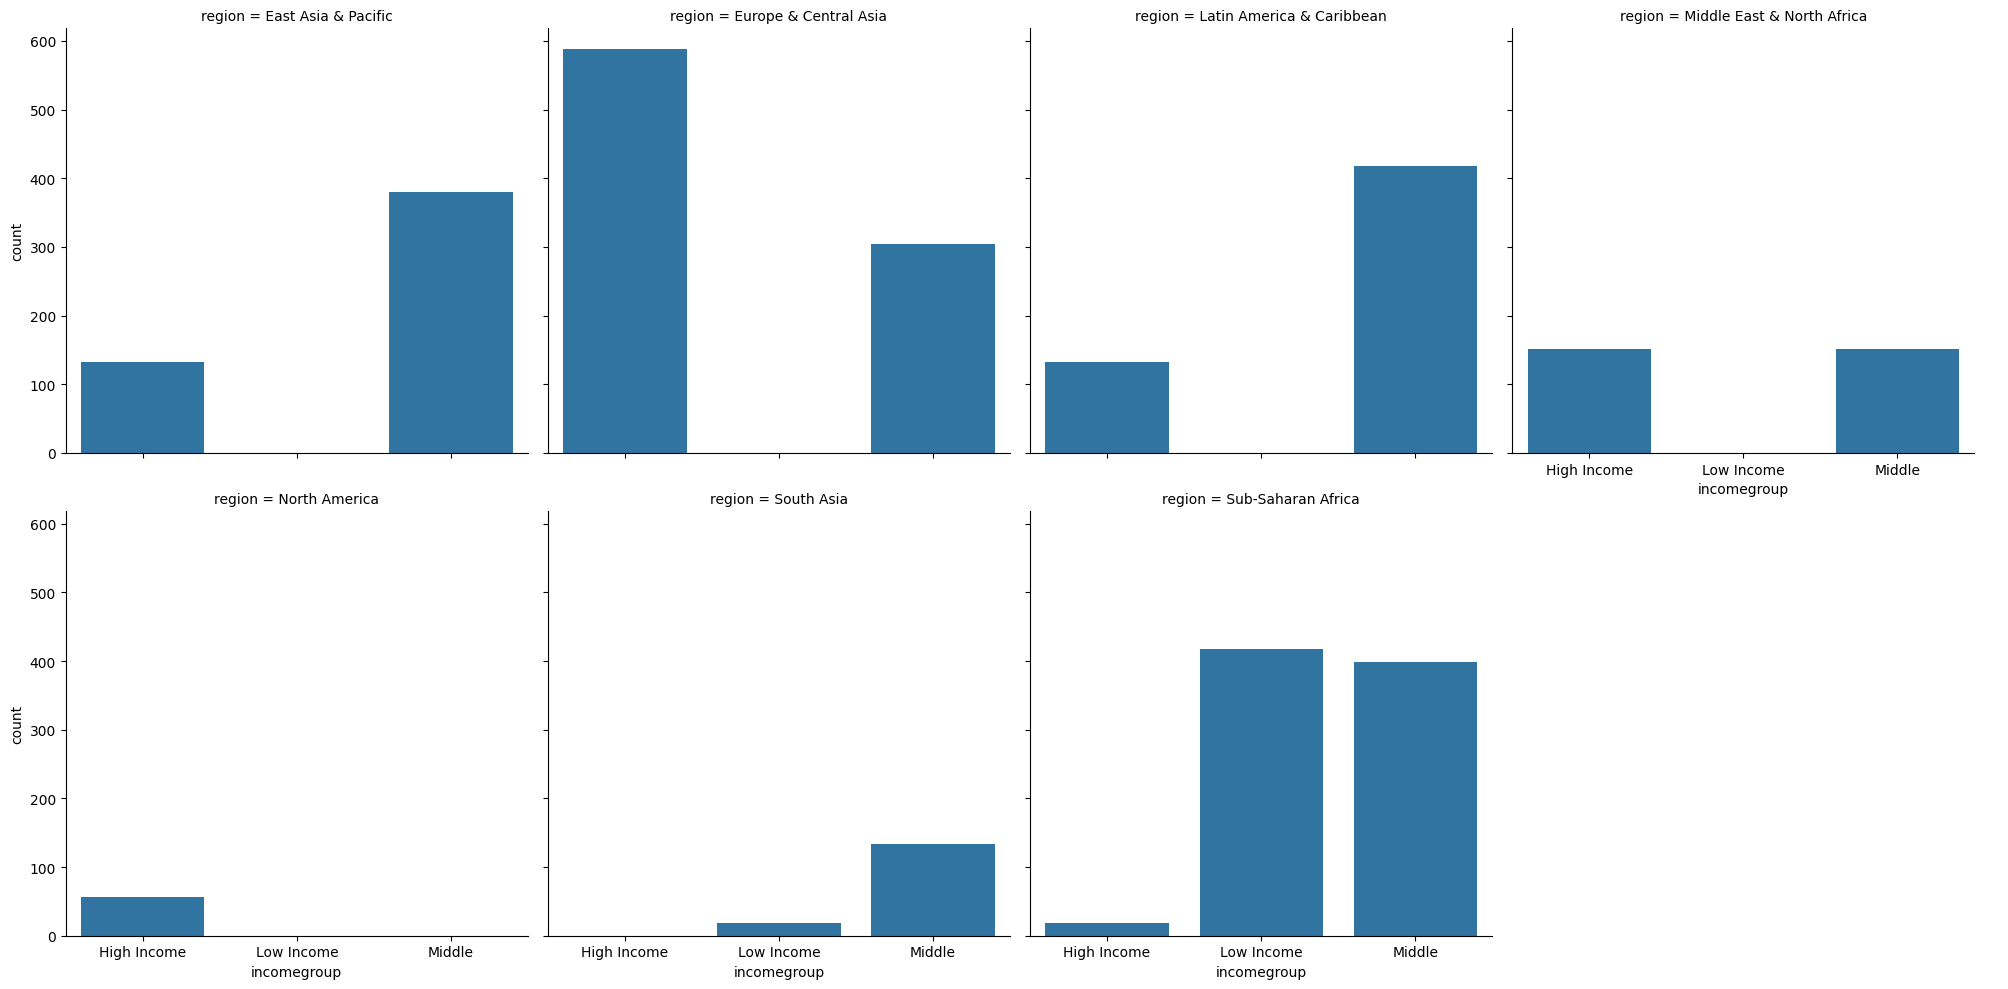

In [39]:
sns.catplot(
    x = 'incomegroup',
    data = life_expectancy,
    kind = 'count',
    col = 'region',
    col_wrap = 4
)

plt.show()

In [43]:
print(life_expectancy[life_expectancy['incomegroup'].str.contains('High Income')])

              country_name country_code                      region  \
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
8      Antigua and Barbuda          ATG   Latin America & Caribbean   
9                Australia          AUS         East Asia & Pacific   
10                 Austria          AUT       Europe & Central Asia   
...                    ...          ...                         ...   
3282                Sweden          SWE       Europe & Central Asia   
3284            Seychelles          SYC          Sub-Saharan Africa   
3291   Trinidad and Tobago          TTO   Latin America & Caribbean   
3297               Uruguay          URY   Latin America & Caribbean   
3298         United States          USA               North America   

      incomegroup                          year  life_expectancy_world_bank  \
3     High Income 1970-01-01 00:00:00.000002001                     